<a href="https://colab.research.google.com/github/JamesSembukuttiarachchi/dl_lab02/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [17]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [4 9 7 2 4 7 9 6 0 8]


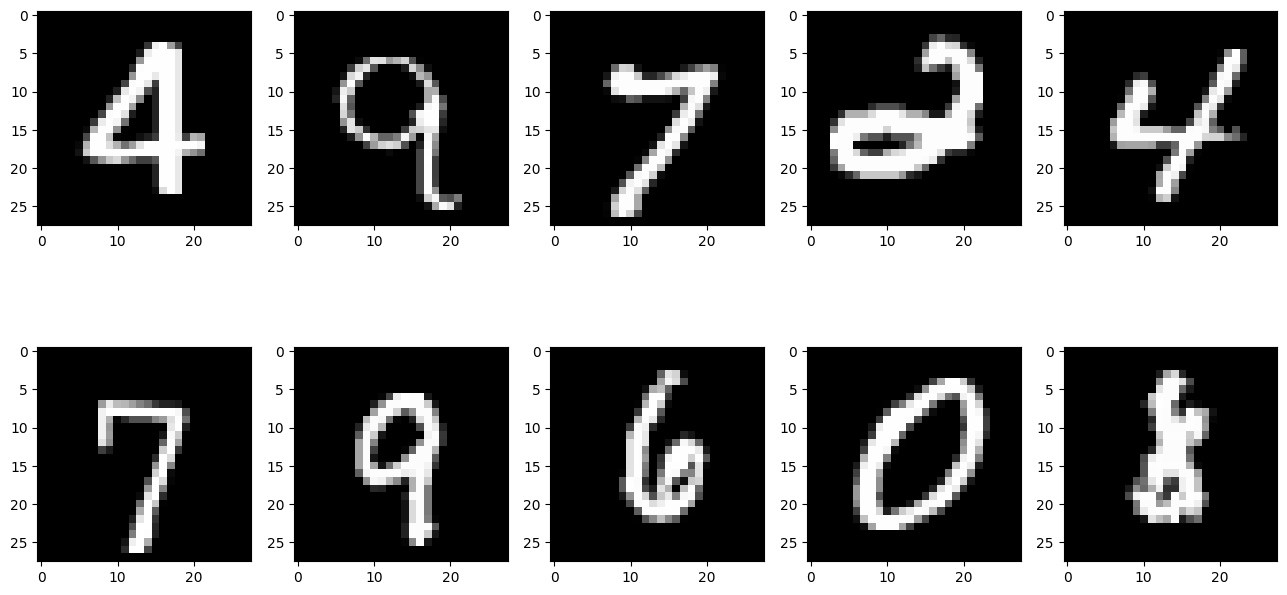

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [19]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [20]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

# Added L1 + L2 regularization to all hidden layers
model.add(Dense(128, activation='relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))

# Output layer (no regularization)
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [22]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8700 - loss: 0.8903
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9592 - loss: 0.4219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9672 - loss: 0.3414
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9699 - loss: 0.2908
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9711 - loss: 0.2581
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9730 - loss: 0.2354
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9771 - loss: 0.2141
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9763 - loss: 0.2090
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9778 - loss: 0.2018
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9796 - loss: 0.1908


Plot the loss and accuracy graphs

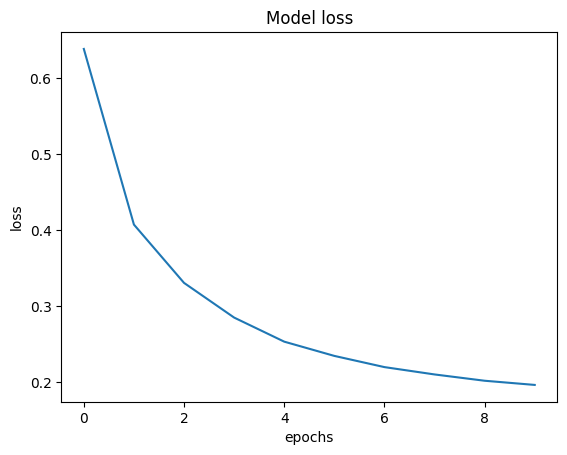

In [23]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

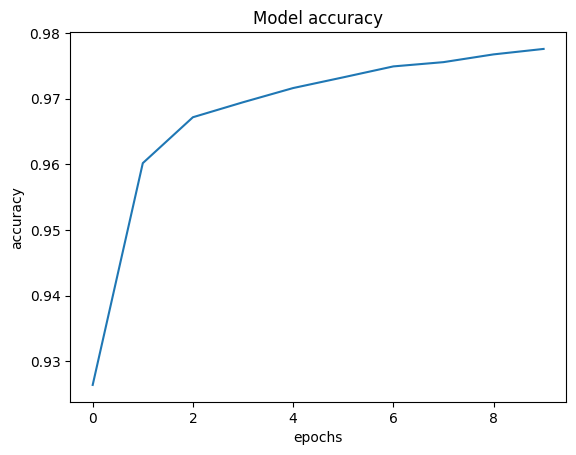

In [24]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9683 - loss: 0.2269
Loss of the Test dataset is: 0.20909345149993896
Accuracy of the test dataset is: 0.9728000164031982
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


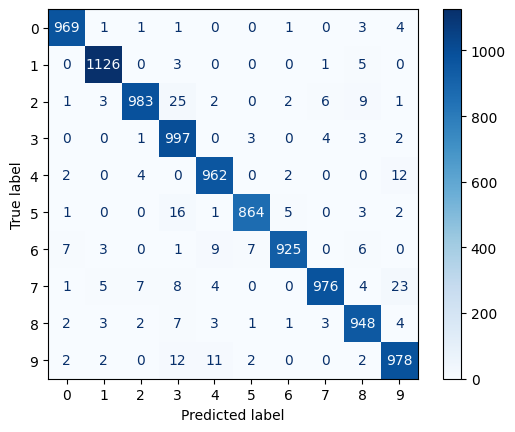

In [27]:
# Evaluate the model
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

# --- Confusion Matrix ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()


Save the model weights

In [26]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

1. Improve test accuracy by changing hyperparameters
You can do this in the model architecture and compile/training part.
In the snippet below, you could:

Increase number of neurons in Dense() layers

Change activation functions

Add more layers

Adjust optimizer settings or learning rate in model.compile()

Increase number of training epochs in model.fit()



model = Sequential()

model.add(Flatten(input_shape=(28,28)))

# Example: increase neurons and use better initialization
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(10, activation='softmax'))


2. Add L1 and L2 regularization
You can add kernel_regularizer to Dense() layers:


from tensorflow.keras import regularizers

model.add(Dense(128, activation='relu',
                kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
Do this for each hidden layer to apply regularization.

3. Visualize class-wise performance (Confusion Matrix)
After model.evaluate() on the test set, predict the labels and use scikit-learn’s confusion matrix:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()